In [1]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\saiet\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\saiet\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\saiet\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\saiet\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
!pip list


Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [3]:
!pip install --upgrade pip setuptools



ERROR: To modify pip, please run the following command:
C:\Users\saiet\anaconda3\python.exe -m pip install --upgrade pip setuptools


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/e1/ed2dd0850446b8697ad28d118df885ad04140c64ace06c4bd559f7c8a94f/setuptools-69.0.2-py3-none-any.whl.metadata
  Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
Using cached setuptools-69.0.2-py3-none-any.whl (819 kB)


In [4]:
import tensorflow as tf
import os

In [5]:
os.listdir('data')

['normal', 'not_normal']

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [7]:
#image viewing

In [8]:
import cv2
from matplotlib import pyplot as plt

In [11]:
#load data

In [12]:
import numpy as np

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5854 files belonging to 2 classes.


In [14]:
#we cannot directly iterate thru the data object.....so we create a numpy iterator for it

In [15]:
data_iterator= data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
len(batch)

2

In [18]:
# two parts.....first is images...second are thr labels

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
#32 batch size....256x256 images with 3 channels....RGB

In [21]:
batch[1]
#0->dog , 1->horse, 2->human

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

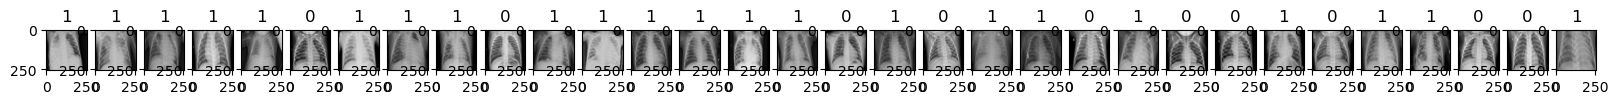

In [22]:
fig, ax = plt.subplots(ncols = 32 ,figsize = (20,20))
for idx,img in enumerate (batch[0][:32]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#displays all the images with thr corresponding labels for a particular batch

In [23]:
#scaling down values to be btwn 0 and 1 (optimization)
scaled =batch[0]/255

In [24]:
scaled.max()

1.0

In [25]:
#preprocessing

In [26]:
#since we need to scale down all images automatically we do it thru a lambda function

In [27]:
#map is tf thingy
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()


In [28]:
batch = scaled_iterator.next()

In [29]:
batch[0].max()

1.0

In [30]:
#splitting into train test and validation

In [37]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)

In [38]:
len(data)#number of batches

183

In [39]:
train_size

128

In [40]:
val_size

37

In [41]:
test_size


18

In [42]:
train_size+val_size+test_size

183

In [43]:
#train is for teaching
#validation set is for evaluation while training....fine tuning
#test set is not used until learning is complete...it is used to verify final result

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [45]:
len(train)

128

In [46]:
len(val)

37

In [47]:
len(test)

18

In [48]:
#deep learning model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [50]:
newmodel = Sequential()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

newmodel = Sequential()

newmodel.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
newmodel.add(MaxPooling2D())

newmodel.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
newmodel.add(MaxPooling2D())

newmodel.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
newmodel.add(MaxPooling2D())

newmodel.add(Flatten())

newmodel.add(Dense(256, activation='relu'))
newmodel.add(Dense(1, activation='sigmoid'))

        

In [52]:
newmodel.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [53]:
newmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [54]:
#training

In [55]:
logdir = 'log'

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [58]:
hist = newmodel.fit(train,epochs = 20,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20


128/128 [==============================] - 91s 672ms/step - loss: 0.3003 - accuracy: 0.8877 - val_loss: 0.2747 - val_accuracy: 0.8826
Epoch 2/20
128/128 [==============================] - 86s 663ms/step - loss: 0.1608 - accuracy: 0.9370 - val_loss: 0.1391 - val_accuracy: 0.9552
Epoch 3/20
128/128 [==============================] - 87s 669ms/step - loss: 0.1431 - accuracy: 0.9451 - val_loss: 0.1321 - val_accuracy: 0.9519
Epoch 4/20
128/128 [==============================] - 79s 605ms/step - loss: 0.1104 - accuracy: 0.9587 - val_loss: 0.1408 - val_accuracy: 0.9527
Epoch 5/20
128/128 [==============================] - 67s 514ms/step - loss: 0.0880 - accuracy: 0.9678 - val_loss: 0.1374 - val_accuracy: 0.9535
Epoch 6/20
128/128 [==============================] - 66s 507ms/step - loss: 0.0873 - accuracy: 0.9675 - val_loss: 0.1270 - val_accuracy: 0.9561
Epoch 7/20
128/128 [==============================] - 66s 504ms/step - loss: 0.0598 - accuracy: 0.9775 - val_loss: 0.1607 - val_

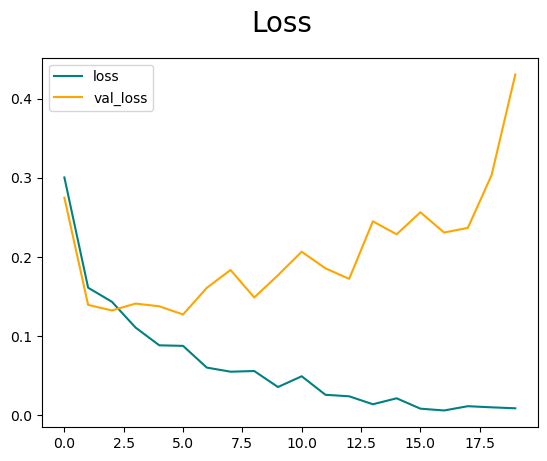

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

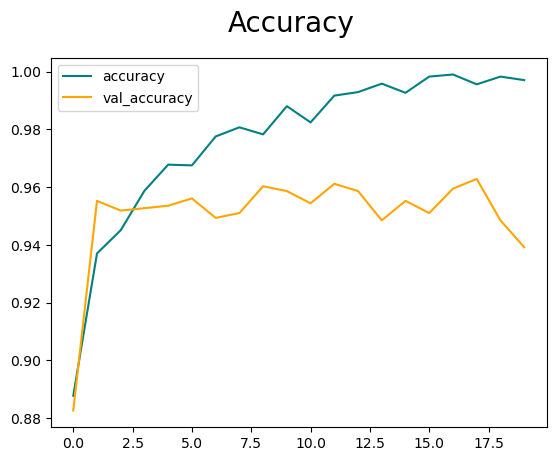

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [61]:
#testing

In [62]:
import cv2
from matplotlib import pyplot as plt

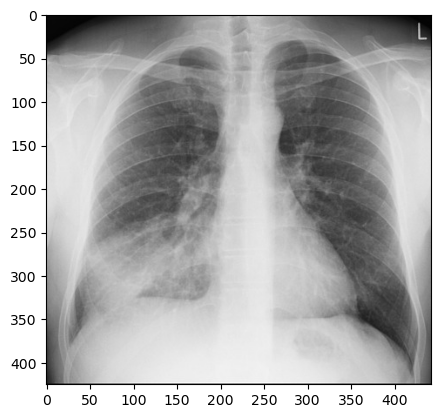

In [85]:
test_img = cv2.imread('infectedonlinetest.jpeg')
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()


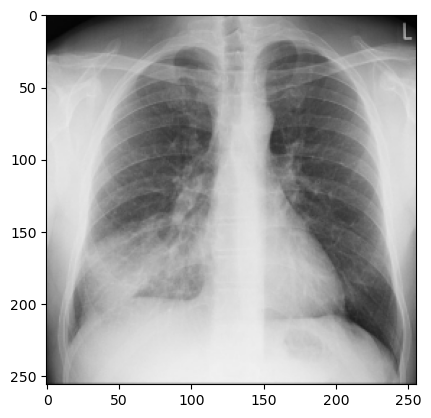

In [86]:
resize = tf.image.resize(test_img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = newmodel.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 78ms/step


In [88]:
yhat

array([[0.97624695]], dtype=float32)

In [89]:
if yhat > 0.5: 
    print(f'infected')
else:
    print(f'normal')

infected


In [90]:
from tensorflow.keras.models import load_model

In [91]:
newmodel.save('classifier.h5')